# Polynômes multivariés : application au cas de la déviation verticale de la poutre encastrée

## Références

* http://openturns.github.io/openturns/master/theory/meta_modeling/chaos_basis.html
* http://openturns.github.io/openturns/master/theory/meta_modeling/orthorgonal_polynomials.html
* http://openturns.github.io/openturns/master/user_manual/_generated/openturns.LinearEnumerateFunction.html
* http://openturns.github.io/openturns/master/user_manual/_generated/openturns.HyperbolicAnisotropicEnumerateFunction.html

## Définir des polyômes multivariés

Dans cette partie, nous allons voir comment définir des polynômes multivariés à partir d'un vecteur aléatoire dont les marginales sont indépendantes. 
Pour commencer, nous devons définir les lois de distributions des variables aléatoires. 

In [1]:
import openturns as ot
import openturns.viewer as otv
import pylab as pl
from matplotlib.ticker import MaxNLocator
from SuperEnumerateFunction import SuperEnumerateFunction

In [2]:
distributionE = ot.Beta(0.9, 3.5, 65.0e9, 75.0e9)
parametersF = ot.LogNormalMuSigma(300.0, 30.0, 0.0)  # Paramétrage par les moments
distributionF = ot.ParametrizedDistribution(parametersF)
distributionL = ot.Uniform(2.50, 2.60)  # En mètres
distributionI = ot.Beta(2.5, 4.0, 1.3e-7, 1.7e-7)  # En m⁴

La classe `OrthogonalProductPolynomialFactory` permet de définir une famille de polynômes multivariés.

In [3]:
multivariateBasis = ot.OrthogonalProductPolynomialFactory(
    [distributionE, distributionF, distributionL, distributionI]
)

La méthode `getEnumerateFunction` permet d'obtenir la règle d'énumération des polynômes multivariés. Par défaut, c'est la règle linéaire qui est utilisée.

In [4]:
enumfunc = multivariateBasis.getEnumerateFunction()
enumfunc

class=LinearEnumerateFunction dimension=4

La méthode `getBasisSizeFromTotalDegree` permet d'obtenir le nombre de multi-indices de degré total inférieur ou égal au degré donné.

In [5]:
totalDegree = 3
P = enumfunc.getBasisSizeFromTotalDegree(totalDegree)
P

35

Dans la boucle suivante, on fait une boucle sur tous les polynômes de degré total inférieur ou égal à 3. Pour chaque polynôme, on évalue la règle d'énumération pour obtenir le multi-indice associé. 

In [6]:
print("#  Degree  Multiindex")
for i in range(P):
    multiindex = enumfunc(i)
    degree = sum(multiindex)
    print("#%d %s %15s" % (i, degree, multiindex))

#  Degree  Multiindex
#0 0       [0,0,0,0]
#1 1       [1,0,0,0]
#2 1       [0,1,0,0]
#3 1       [0,0,1,0]
#4 1       [0,0,0,1]
#5 2       [2,0,0,0]
#6 2       [1,1,0,0]
#7 2       [1,0,1,0]
#8 2       [1,0,0,1]
#9 2       [0,2,0,0]
#10 2       [0,1,1,0]
#11 2       [0,1,0,1]
#12 2       [0,0,2,0]
#13 2       [0,0,1,1]
#14 2       [0,0,0,2]
#15 3       [3,0,0,0]
#16 3       [2,1,0,0]
#17 3       [2,0,1,0]
#18 3       [2,0,0,1]
#19 3       [1,2,0,0]
#20 3       [1,1,1,0]
#21 3       [1,1,0,1]
#22 3       [1,0,2,0]
#23 3       [1,0,1,1]
#24 3       [1,0,0,2]
#25 3       [0,3,0,0]
#26 3       [0,2,1,0]
#27 3       [0,2,0,1]
#28 3       [0,1,2,0]
#29 3       [0,1,1,1]
#30 3       [0,1,0,2]
#31 3       [0,0,3,0]
#32 3       [0,0,2,1]
#33 3       [0,0,1,2]
#34 3       [0,0,0,3]


## Exercices

## Solution de l'exercice 1 : règle d'énumération linéaire

In [7]:
enumfunc = multivariateBasis.getEnumerateFunction()
multiindex = enumfunc(52)
multiindex

[1,0,2,1]

On note :
* $\xi_E$ la variable aléatoire standard associée à la variable physique $E$ par la transformation $\xi_E = T_E(E)$,
* $\xi_F$ la variable aléatoire standard associée à la variable physique $F$ par la transformation $\xi_F = T_F(F)$,
* $\xi_L$ la variable aléatoire standard associée à la variable physique $L$ par la transformation $\xi_L = T_L(L)$,
* $\xi_I$ la variable aléatoire standard associée à la variable physique $I$ par la transformation $\xi_I = T_I(I)$.

Le multi-indice précédent est associé 
* au polynôme de Jacobi $J_1$ degré 1 en $\xi_E$,
* au polynôme orthogonal associé à la loi log-normale de degré 0 en $\xi_F$,
* au polynôme de Legendre $L_2$ de degré 2 en $\xi_L$,
* au polynôme de Jacobi $J_1$ de degré 1 en $\xi_I$.

Le polynôme multivarié $\psi_\alpha$ est donc :
$$
\psi_\alpha(\xi) = J_1(\xi_E) \times \pi^F_0 (\xi_F) \times L_2 (\xi_L) \times J_1(\xi_I)
$$
pour tout $\xi\in\mathcal{X} \subseteq \mathbf{R}^4$.

In [8]:
totaldegree = sum(multiindex)
totaldegree

4

In [9]:
P = multivariateBasis.build(52)
P

class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,x1,x2,x3,y0] evaluationImplementation=class=ProductPolynomialEvaluation, polynomials=[class=UniVariatePolynomial coefficients=class=Point name=Unnamed dimension=2 values=[0.935347,2.23044],class=UniVariatePolynomial coefficients=class=Point name=Unnamed dimension=1 values=[1],class=UniVariatePolynomial coefficients=class=Point name=Unnamed dimension=3 values=[-1.11803,0,3.3541],class=UniVariatePolynomial coefficients=class=Point name=Unnamed dimension=2 values=[-0.57735,2.3094]] gradientImplementation=class=ProductPolynomialGradient hessianImplementation=class=ProductPolynomialHessian

On voit que le polynôme ne dépend pas de $\xi_F$, ce qui correspond en effet à l'exposant égal à zéro dans le multi-indice.

## Solution de l'exercice 2 : règle d'énumération hyperbolique

In [10]:
enumfunc = ot.HyperbolicAnisotropicEnumerateFunction(4, 0.5)

w = enumfunc.getWeight()
w

class=Point name=Unnamed dimension=4 values=[1,1,1,1]

In [11]:
for i in range(10):
    print(i, enumfunc(i))

0 [0,0,0,0]
1 [1,0,0,0]
2 [0,1,0,0]
3 [0,0,1,0]
4 [0,0,0,1]
5 [2,0,0,0]
6 [0,2,0,0]
7 [0,0,2,0]
8 [0,0,0,2]
9 [3,0,0,0]


## Solution de l'exercice 3 : utilisation d'une règle d'énumération

In [12]:
marginals = [distributionE, distributionF, distributionL, distributionI]
stdPolyColl = [ot.StandardDistributionPolynomialFactory(m) for m in marginals]
polyColl = ot.PolynomialFamilyCollection(stdPolyColl)
polyColl

[class=OrthogonalUniVariatePolynomialFamily implementation=class=StandardDistributionPolynomialFactory hasSpecificFamily=true specificFamily=class=OrthogonalUniVariatePolynomialFamily implementation=class=JacobiFactory alpha=1.2 beta=-0.1 measure=class=Beta name=Beta dimension=1 alpha=0.9 beta=2.2 a=-1 b=1,class=OrthogonalUniVariatePolynomialFamily implementation=class=StandardDistributionPolynomialFactory hasSpecificFamily=false orthonormalization algorithm=class=OrthonormalizationAlgorithm implementation=class=AdaptiveStieltjesAlgorithm measure=class=LogNormal name=LogNormal dimension=1 muLog=9.46206 sigmaLog=0.554513 gamma=0 monicRecurrenceCoefficients=class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=2 dimension=3 data=[[1,-15000,0],[1,-33144,-8.1e+07]] monicSquaredNorms=class=Point name=Unnamed dimension=2 values=[1,8.1e+07] isElliptical=false,class=OrthogonalUniVariatePolynomialFamily implementation=class=StandardDistributionPolynomialFactory h

In [13]:
multivariateBasis = ot.OrthogonalProductPolynomialFactory(polyColl, enumfunc)
multivariateBasis

Index,Name,Distribution,Univariate polynomial
0,X0,Beta,JacobiFactory
1,X1,LogNormal,AdaptiveStieltjesAlgorithm
2,X2,Uniform,LegendreFactory
3,X3,Beta,JacobiFactory


In [14]:
nodes, weights = multivariateBasis.getNodesAndWeights([2, 2, 2, 2])
print(nodes)
print(weights)

 0 : [    -0.732453 11293.1         -0.57735     -0.274292 ]
 1 : [     0.222649 11293.1         -0.57735     -0.274292 ]
 2 : [    -0.732453 36850.9         -0.57735     -0.274292 ]
 3 : [     0.222649 36850.9         -0.57735     -0.274292 ]
 4 : [    -0.732453 11293.1          0.57735     -0.274292 ]
 5 : [     0.222649 11293.1          0.57735     -0.274292 ]
 6 : [    -0.732453 36850.9          0.57735     -0.274292 ]
 7 : [     0.222649 36850.9          0.57735     -0.274292 ]
 8 : [    -0.732453 11293.1         -0.57735      0.607625 ]
 9 : [     0.222649 11293.1         -0.57735      0.607625 ]
10 : [    -0.732453 36850.9         -0.57735      0.607625 ]
11 : [     0.222649 36850.9         -0.57735      0.607625 ]
12 : [    -0.732453 11293.1          0.57735      0.607625 ]
13 : [     0.222649 11293.1          0.57735      0.607625 ]
14 : [    -0.732453 36850.9          0.57735      0.607625 ]
15 : [     0.222649 36850.9          0.57735      0.607625 ]
[0.116521,0.0568259,0.01

## Solution de l'exercice 4 : nombre de polynômes avec la règle d'énumération linéaire


Définit la base de polynômes avec la règle d'énumération linéaire par défaut.

In [15]:
multivariateBasis = ot.OrthogonalProductPolynomialFactory(
    [distributionE, distributionF, distributionL, distributionI]
)
enumfunc = multivariateBasis.getEnumerateFunction()

Plot the number of polynomials as a function of highest polynomial degree (using the linear enumeration).

In [16]:
enumfunc = multivariateBasis.getEnumerateFunction()
degreeList = range(1, 15)
basisSize_list = []
for totalDegree in degreeList:
    nbcoeffs = enumfunc.getBasisSizeFromTotalDegree(totalDegree)
    basisSize_list.append(nbcoeffs)

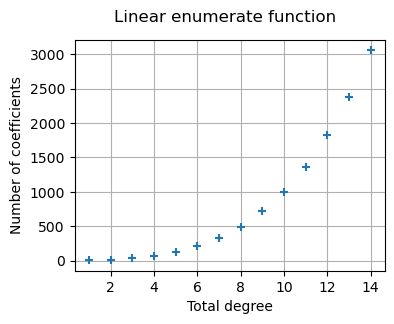

In [17]:
graph = ot.Graph(
    "Linear enumerate function", "Total degree", "Number of coefficients", True
)
cloud = ot.Cloud(degreeList, basisSize_list)
graph.add(cloud)
view = otv.View(graph, figure_kw={"figsize": (4.0, 3.0)})
pl.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

## Exercice 5 : utilisation d'une règle d'énumération hyperbolique


In [18]:
def printMultiIndices(enumerateFunction, maximumDegree):
    basisSize = enumerateFunction.getBasisSizeFromTotalDegree(maximumDegree)
    print("Number of coefficients with degree lower than %s is %s" % (maximumDegree, basisSize))

    print("Total degree" + "     " + "Multi-index")
    for i in range(basisSize):
        index = enumerateFunction(i)
        degree = sum(index)
        print("#%d %4d %18s" % (i, degree, index))
    return

Use the `printMultiIndices` to print the multi-indices with maximum degree less than 5.
* For a given enumerate function, the `getBasisSizeFromTotalDegree(maximumDegree)` method returns the number of coefficients with maximum degree lower than `maximumDegree`. Set the `maximumDegree` to 5 and consider the following list of quasi-norm parameters :
```python
q_list = [0.1, 0.3, 0.6, 0.9, 1.0]
```
For each value of this quasi-norm parameter, print the number of coefficients associated with the hyperbolic enumerate function. What do you observe ?
* Set the quasi-norm parameter `q=0.6`. Consider the maximum degree equal from 1 to 10. For each maximum degree value, compare the number of coefficients associated with the linear and hyperbolic enumeration functions. What do you observe ?

## Solution de l'exercice 5 : utilisation d'une règle d'énumération hyperbolique

In [19]:
dim_input = 4
polyColl = ot.PolynomialFamilyCollection(dim_input)
polyColl[0] = ot.StandardDistributionPolynomialFactory(distributionE)
polyColl[1] = ot.StandardDistributionPolynomialFactory(distributionF)
polyColl[2] = ot.StandardDistributionPolynomialFactory(distributionL)
polyColl[3] = ot.StandardDistributionPolynomialFactory(distributionI)
#
q = 0.6  # the q-quasi-norm parameter used to create a HyperbolicAnisotropicEnumerateFunction object.
enumerateFunction = ot.HyperbolicAnisotropicEnumerateFunction(dim_input, q)

multivariateBasis = ot.OrthogonalProductPolynomialFactory(polyColl, enumerateFunction)

printMultiIndices(enumerateFunction, 5)

Number of coefficients with degree lower than 5 is 39
Total degree     Multi-index
#0    0          [0,0,0,0]
#1    1          [1,0,0,0]
#2    1          [0,1,0,0]
#3    1          [0,0,1,0]
#4    1          [0,0,0,1]
#5    2          [2,0,0,0]
#6    2          [0,2,0,0]
#7    2          [0,0,2,0]
#8    2          [0,0,0,2]
#9    3          [3,0,0,0]
#10    3          [0,3,0,0]
#11    3          [0,0,3,0]
#12    3          [0,0,0,3]
#13    2          [1,1,0,0]
#14    2          [1,0,1,0]
#15    2          [1,0,0,1]
#16    2          [0,1,1,0]
#17    2          [0,1,0,1]
#18    2          [0,0,1,1]
#19    4          [4,0,0,0]
#20    4          [0,4,0,0]
#21    4          [0,0,4,0]
#22    4          [0,0,0,4]
#23    3          [2,1,0,0]
#24    3          [2,0,1,0]
#25    3          [2,0,0,1]
#26    3          [1,2,0,0]
#27    3          [0,2,1,0]
#28    3          [0,2,0,1]
#29    3          [1,0,2,0]
#30    3          [0,1,2,0]
#31    3          [0,0,2,1]
#32    3          [1,0,0,2]
#33

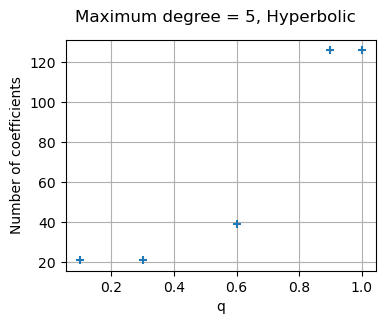

In [20]:
maximumDegree = 5
q_list = [0.1, 0.3, 0.6, 0.9, 1.0]
basisSize_list = []
for j in q_list:
    enumerateFunction_aux = ot.HyperbolicAnisotropicEnumerateFunction(dim_input, j)
    numberOfCoefficients = enumerateFunction_aux.getBasisSizeFromTotalDegree(
        maximumDegree
    )
    basisSize_list.append(numberOfCoefficients)

graph = ot.Graph(
    "Maximum degree = %s, Hyperbolic" % (maximumDegree),
    "q",
    "Number of coefficients",
    True,
)
cloud = ot.Cloud(q_list, basisSize_list)
graph.add(cloud)
view = otv.View(graph, figure_kw={"figsize": (4.0, 3.0)})

On observe que, lorsque `q` augmente, alors le nombre de coefficients augmente considérablement.

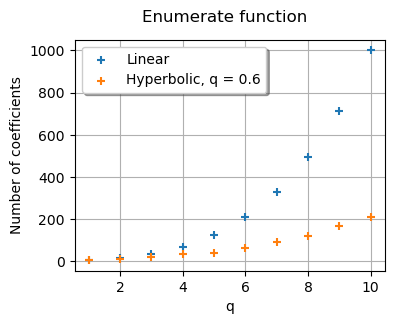

In [21]:
p_list = range(1, 11)
basisSize_listHyper = []
basisSize_listLinear = []

enumLinear = ot.LinearEnumerateFunction(dim_input)
enumHyper = ot.HyperbolicAnisotropicEnumerateFunction(dim_input, q)
for i in p_list:
    numberOfCoefficients = enumLinear.getBasisSizeFromTotalDegree(i)
    basisSize_listLinear.append(numberOfCoefficients)
    numberOfCoefficients = enumHyper.getBasisSizeFromTotalDegree(i)
    basisSize_listHyper.append(numberOfCoefficients)

graph = ot.Graph("Enumerate function", "q", "Number of coefficients", True, "topleft")
cloudLinear = ot.Cloud(p_list, basisSize_listLinear)
cloudLinear.setLegend("Linear")
#cloudLinear.setColor("red")
graph.add(cloudLinear)
cloudHyper = ot.Cloud(p_list, basisSize_listHyper)
cloudHyper.setLegend("Hyperbolic, q = %.1f" % q)
graph.add(cloudHyper)
view = otv.View(graph, figure_kw={"figsize": (4.0, 3.0)})

On observe que, avec `q=0.6`, la règle d'énumération hyperbolique produit un nombre de coefficients très petit par rapport à la règle d'énumération linéaire.

## Solution de l'exercice 6 : graphique des indices linéaires, hyperboliques et norme infinie

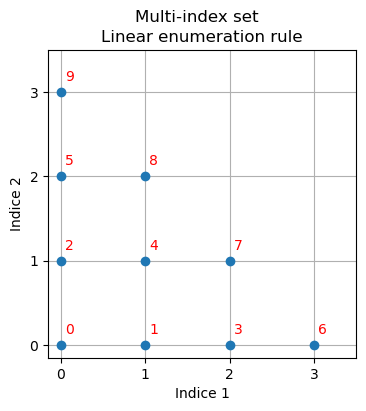

In [22]:
enumfunc = ot.LinearEnumerateFunction(2)
numberOfIndices = 10
super_enum = SuperEnumerateFunction(enumfunc)
view = super_enum.draw_by_order(numberOfIndices)
maximum_index = 3.5
pl.xlim(right=maximum_index)
pl.ylim(top=maximum_index)
_ = pl.title("Linear enumeration rule")

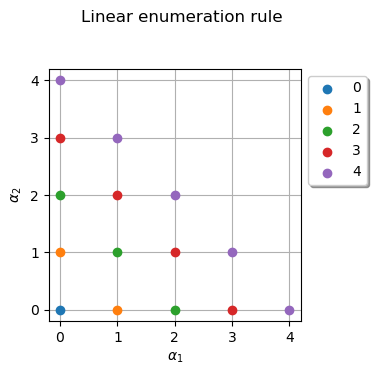

In [23]:
view = super_enum.draw_by_layer(5)

On observe que les multiindices apparaissent selon un chemin diagonal. Sur une diagonale, le degré des polynômes est constant. 
* Les points d'indice 1, 2 sont de degré constant égal à 1. 
* Les points d'indice 3, 4, 5 sont de degré constant égal à 2. 
* Les points d'indice 6, 7, 8, 9 sont de degré constant égal à 3. 

Une telle diagonale est nommée "strate" dans la librairie. 

Cet ordre d'énumération permet d'énumérer les polynômes par strates de degrés croissants.

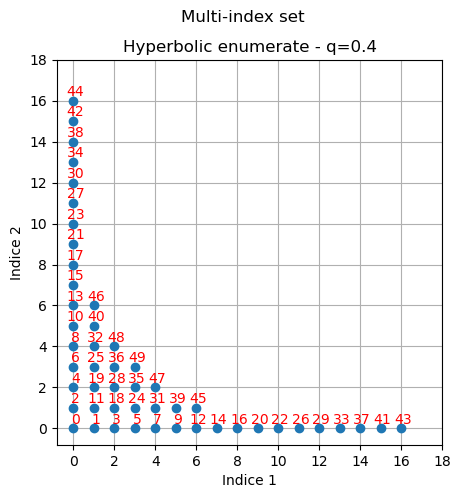

In [24]:
q = 0.4
enumfunc = ot.HyperbolicAnisotropicEnumerateFunction(2, q)
numberOfIndices = 50
super_enum = SuperEnumerateFunction(enumfunc)
view = super_enum.draw_by_order(numberOfIndices, figure_kw={"figsize": (5.0, 5.0)})
maximum_index = 18.0
pl.xlim(right=maximum_index)
pl.ylim(top=maximum_index)
_ = pl.title("Hyperbolic enumerate - q=%s" % (q))

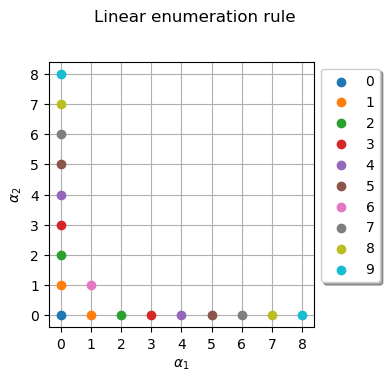

In [25]:
view = super_enum.draw_by_layer(10)

On observe que les multi-indices associés à des degrés élevés sont énumérés plus tôt dans la séquence. On observe que les degrés associés à des interactions entre X0 et X1 de degré élevé n'apparaissent pas parmi les premiers termes de la séquence. Par exemple, le multi-indice d'indice 8 est (4,0) (correspondant à un polynôme de degré 4), mais que le multi-indice (2,2) n'apparaît plus parmi les premiers termes. 

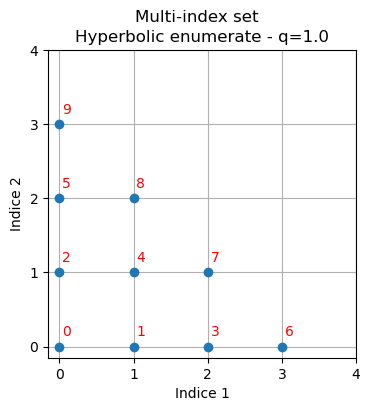

In [26]:
q = 1.0
enumfunc = ot.HyperbolicAnisotropicEnumerateFunction(2, q)
numberOfIndices = 10
super_enum = SuperEnumerateFunction(enumfunc)
view = super_enum.draw_by_order(numberOfIndices)
maximum_index = 4.0
pl.xlim(right=maximum_index)
pl.ylim(top=maximum_index)
_ = pl.title("Hyperbolic enumerate - q=%s" % (q))

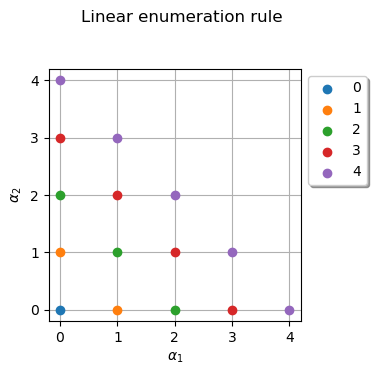

In [27]:
view = super_enum.draw_by_layer(5)

On observe que la règle d'énumération hyperbolique avec q=1 est équivalente à la règle linéaire.

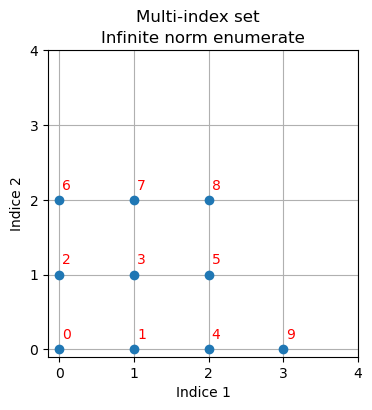

In [28]:
enumfunc = ot.NormInfEnumerateFunction(2)
numberOfIndices = 10
super_enum = SuperEnumerateFunction(enumfunc)
view = super_enum.draw_by_order(numberOfIndices)
maximum_index = 4.0
pl.xlim(right=maximum_index)
pl.ylim(top=maximum_index)
_ = pl.title("Infinite norm enumerate")

On observe que la règle en norme infinie permet d'assurer que les interactions de degré élevé apparaissent plus rapidement dans l'énumération.

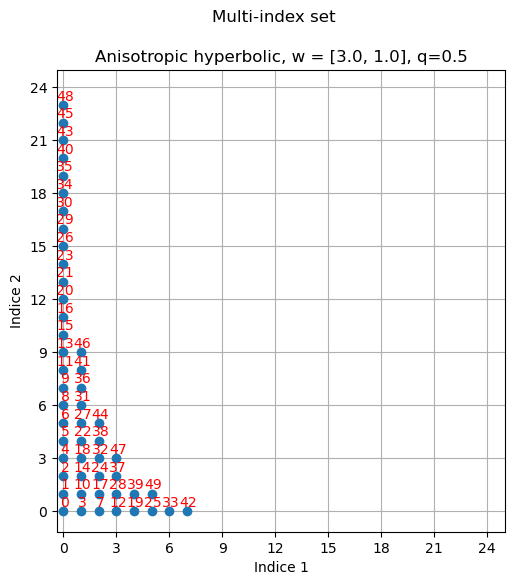

In [29]:
weights = [3.0, 1.0]
q = 0.5
enumfunc = ot.HyperbolicAnisotropicEnumerateFunction(weights, q)
numberOfIndices = 50
super_enum = SuperEnumerateFunction(enumfunc)
view = super_enum.draw_by_order(numberOfIndices, figure_kw={"figsize": (6.0, 6.0)})
maximum_index = 25.0
pl.xlim(right=maximum_index)
pl.ylim(top=maximum_index)
_ = pl.title("Anisotropic hyperbolic, w = %s, q=%s" % (weights, q))

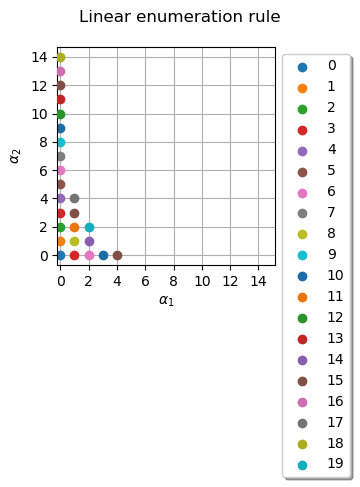

In [30]:
view = super_enum.draw_by_layer(20)

On observe que la première marginale associée au poids $w_1 = 3$ possède un degré marginal moins élevé. Au contraire, la seconde marginale associée au poids $w_2 = 1$ possède un degré marginal plus élevé. Cela montre que si on souhaite favoriser la marginale d'indice $i = 1, ..., p$ où $p$ est la dimension du vecteur aléatoire d'entrée, alors on devrait utiliser un poids $w_i$ relativement plus faible. 